# Capítulo 6: Regressão e Classificação

# Parte 1

## Exercício 1
**Objetivo: Visualizar pontos medidos e comparar com uma teoria**

Quando observamos a realidade, somos capazes de *medir* coisas. Por exemplo, podemos tentar medir a velocidade do som da seguinte forma: uma pessoa dá um grito ao mesmo tempo em que aciona um cronômetro, e outra pessoa, a alguns metros de distância, pára esse mesmo cronômetro no momento em que ouve o grito. Repetimos o experimento para várias distâncias diferentes e conseguimos, então, uma série de medidas pareadas de tempo e distância.

Se fôssemos capazes de acionar o cronômetro exatamente no tempo em que o grito é emitido, e pudéssemos parar o cronômetro exatamente no instante em que o grito é ouvido, então teríamos a seguinte situação:

Sabemos que o som se propaga em uma determinada velocidade, que é constante, e portanto o som obedece a um movimento uniforme. Vamos chamar essa velocidade de $c$. Para cada distância $\Delta s$ teríamos um tempo de propagação igual a $t = \frac{1}{c} \Delta s$.

Essa ideia de que um fenômeno obedece a uma equação (ou a um modelo, ou a uma "regra", ou uma lei) chama-se *teoria*. Então, poderíamos ter resultados *teóricos* que poderiam se parecer com:

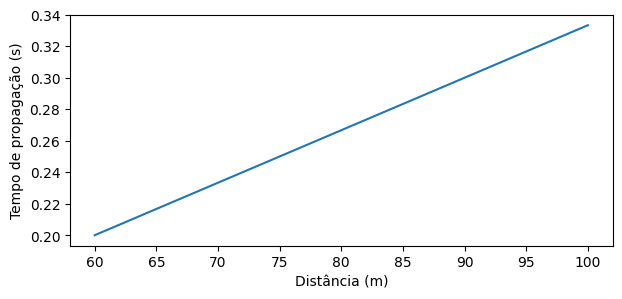

In [25]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

plt.figure(figsize=(7,3))
plt.plot(delta_s, t)
plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.show()

Porém, na realidade, nossa medição é bastante imperfeita. A primeira fonte dessas imperfeições é que, ao medirmos o tempo de propagação do som, usamos um cronômetro acionado manualmente - então, não somos capazes de acionar o cronômetro *exatamente* no instante em que o som é gerado ou recebido. Outra fonte de erro é que a velocidade do som não é *exatamente* uma constante, porque alterações como ventos e diferenças de temperatura do ar podem afetar a propagação sonora. Também, há fontes de erro que não somos exatamente capazes de prever.

Cada um desses erros gera um desvio, e cada um desses desvios tem uma distribuição diferente. Quando somamos todos esses desvios com distribuições diferentes, temos um desvio total com uma distribuição Gaussiana (lembre-se que a Normal, ou Gaussiana, é a distribuição que aparece quando somamos várias contribuições aleatórias de diferentes fontes!) com média zero e desvio padrão que não conhecemos ainda. Então, poderíamos encontrar, de fato, a seguinte situação:

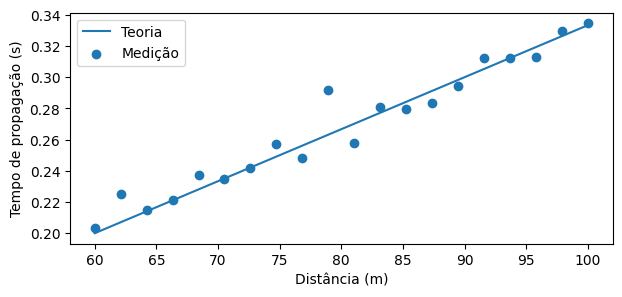

In [26]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

desvio_padrao_da_medicao = 0.01 # Desvio padrão, em segundos - esse número também é inventado!
t_medido = t + np.random.randn(20) * desvio_padrao_da_medicao

plt.figure(figsize=(7,3))
plt.plot(delta_s, t, label='Teoria')
plt.scatter(delta_s, t_medido, label='Medição')

plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.legend()
plt.show()

O problema disso tudo é que, geralmente, não conseguimos saber quais são os parâmetros "reais" do fenômeno - na verdade, não sabemos nem ao certo que ele obedece a alguma equação. Por isso, precisamos trabalhar com essa suposição sobre como o fenômeno se comporta, e por isso essa suposição é chamada de *teoria*, e não de *realidade*.

A palavra *teoria* pode ser entendida como: "uma ideia que existe dentro na nossa cabeça e que pode ou não corresponder à realidade". Claro que gostaríamos que nossa teoria se aproximasse mais da nossa realidade - realidade essa que só pode ser acessada à partir das medições. Então, vamos elaborar *hipóteses* sobre o fenômeno e usá-las para encontrar nosso modelo teórico.

Usando o código abaixo, discuta:

a) Apenas olhando a figura, é possível decidir qual das hipóteses é a que melhor explica os pontos que foram medidos? O que significa "explicar melhor"?

b) Quando aumentamos o `desvio_padrao_da_medicao`, fica mais fácil ou mais difícil decidir por uma hipótese?

c) Quando diminuimos o `desvio_padrao_da_medicao`, fica mais fácil ou mais difícil decidir por uma hipótese?

d) Quando aumentamos o número de pontos medidos, fica mais fácil ou mais difícil decidir por uma hipótese?

e) Quando diminuímos o número de pontos medidos, fica mais fácil ou mais difícil decidir por uma hipótese?

f) Se as hipóteses forem muito próximas umas das outras, é mais fácil ou mais difícil escolher uma delas?

g) Se as hipóteses forem muito próximas umas das outras, é mais relevante ou menos relevante escolher exatamente a hipótese correta?

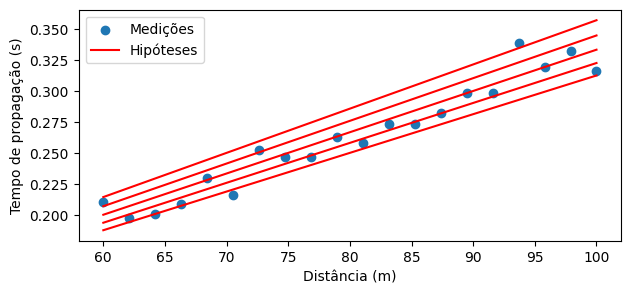

In [27]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

desvio_padrao_da_medicao = 0.01 # Desvio padrão, em segundos - esse número também é inventado!
t_medido = t + np.random.randn(20) * desvio_padrao_da_medicao

plt.figure(figsize=(7,3))
plt.scatter(delta_s, t_medido)
plt.plot(delta_s, (1/280) * delta_s, 'r')
plt.plot(delta_s, (1/290) * delta_s, 'r')
plt.plot(delta_s, (1/300) * delta_s, 'r')
plt.plot(delta_s, (1/310) * delta_s, 'r')
plt.plot(delta_s, (1/320) * delta_s, 'r')
plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.legend(['Medições', 'Hipóteses'])
plt.show()

## Exercício 2
*Objetivo: encontrar e analisar o erro de aproximação entre modelo e medidas*

Uma característica dos modelos teóricos é que eles existem somente no mundo das abstrações. É claro que, se quisermos usar nosso modelo teórico para fazer algum tipo de predição, então precisamos de um modelo teórico que se aproxime da realidade. Em outras palavras, ao compararmos dois modelos teóricos, como nas curvas abaixo, gostaríamos de escolher o modelo da curva azul, e não o da curva vermelha:

<img src="teoria_boa_vs_nao_boa.png" />

Claro que não podemos usar o critério de "olho" ou "intuição" para fazer essa escolha (até podemos no sentido de capacidade, ou mesmo de legalidade, mas com certeza não deveríamos). Ao invés disso, queremo usar um critério objetivo, isto é, encontrar um número que nos diga o quão bom é um modelo. Uma das propostas mais comuns para isso é o **erro quadrático médio**, ou EQM, que funciona da seguinte forma:

    Para cada ponto medido (x,y), com o modelo y_est=a*x_medido+b:
        estime o valor fornecido pelo modelo y_est = a*x_medido + b
        calcule o erro quadrático EQ = (y_est-y_medido)**2
    
    Após:
        calcule o EQM como a média de todos os EQs

Outra maneira de entender o EQM é como uma equação:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - (ax_n + b))^2
$$

Nesta atividade, vamos analisar como o EQM se comporta quando variamos os coeficientes do modelo.

1. No código abaixo, complete a função `EQM` para que ela calcule o EQM de um modelo linear frente a medições recebidas como entrada.
1. Na figura que é gerada, qual é o coeficiente angular teórico que leva ao menor EQM? Como ele se compara com o EQM teórico?
1. Aumente o `desvio_padrao_da_medicao`. Como isso afeta o valor mínimo do EQM?

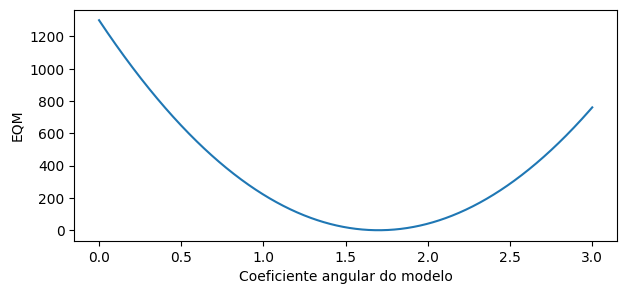

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def erro( parametros ):
    medidas_x, medidas_y, coef_angular_modelo, coef_linear_modelo = parametros
    estimativa_y = coef_linear_modelo + coef_angular_modelo * medidas_x
    eqm = np.mean( (estimativa_y - medidas_y)**2 )

    return eqm

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_linear_real = 0
coef_angular_real = 1.7
desvio_padrao_da_medicao = 0.1 # Desvio padrão, em segundos - esse número também é inventado!
medidas_y = coef_linear_real + coef_angular_real * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Gerando o modelo
coef_linear_modelo = 0
coef_angular_modelo = 1.8

# Candidatos
candidatos_coef_angular = np.linspace(0,3,1000)
eqms = []
for idx, a_ in enumerate(candidatos_coef_angular):
    erro_quadratico_medio = erro( (medidas_x, medidas_y, a_, coef_linear_modelo) )
    eqms.append(erro_quadratico_medio)

plt.figure(figsize=(7,3))
plt.plot(candidatos_coef_angular, eqms)
plt.xlabel('Coeficiente angular do modelo')
plt.ylabel('EQM')
plt.show()


## Exercício 3
*Objetivo: Calcular a derivada do erro em relação aos parâmetros da reta*

Em várias aplicações, sabemos de antemão que o coeficiente linear do modelo é zero. Isso significa que o erro do modelo é simplesmente:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - a x_n)^2 = \frac{1}{N} \sum_{n=1}^N y_n^2 - 2 a x_n y_n + a^2 x_n^2
$$

1. Calcule a derivada de EQM em relação ao coeficiente angular $a$, isto é, calcule (no papel) $e'(a) = \frac{d\text{EQM}}{da}$. DICA: calcule a derivada para um único ponto (por exemplo, $n=1$), e então some as derivadas para todos os pontos.
1. Implemente o cálculo de $e'(a)$ na função abaixo. Quais são os valores de $e'(a)$ quando $a$ (o coeficiente angular do modelo) é muito superior ao coeficiente angular "real"? E se $a$ é inferior ao coeficiente angular "real"?

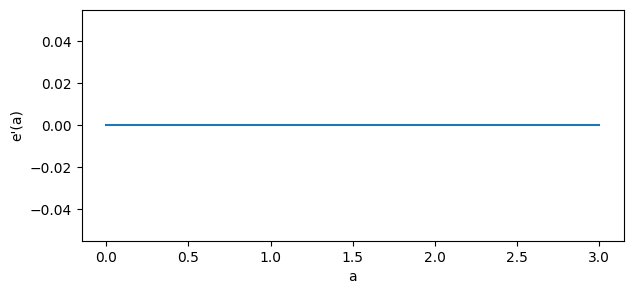

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def deqm_da(medidas_x, medidas_y, coef_angular_tentativa):
    # Complete esta função

    return 0

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.1 # Desvio padrão, em segundos - esse número também é inventado!
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Gerando o modelo
coef_angular_modelo = 1.8

# Candidatos
candidatos_coef_angular = np.linspace(0,3,1000)
eqms = []
for idx, a_ in enumerate(candidatos_coef_angular):
    erro_quadratico_medio = deqm_da(medidas_x, medidas_y, a_)
    eqms.append(erro_quadratico_medio)

plt.figure(figsize=(7,3))
plt.plot(candidatos_coef_angular, eqms)
plt.xlabel('a')
plt.ylabel("e'(a)")
plt.show()


# Exercício 4
*Objetivo: entender o processo de descida pelo gradiente*

Partindo de um modelo linear com coeficiente angular $a$, podemos estimar um novo modelo usando:

$a_{\text{novo}} = a_{\text{atual}} + \alpha e'(a)$, onde $\alpha$ é um valor pequeno e positivo como $0.01$.

1. O modelo com coeficiente linear $a_{\text{novo}}$ deve ter EQM maior ou menor que o modelo com $a_{\text{atual}}$?
1. Como poderíamos mudar o procedimento de estimativa de forma que o modelo novo tenha EQM menor que o modelo antigo?
1. Usando as funções que você já implementou, complete a função `melhorar_modelo` no código abaixo de forma a implementar o cálculo de um $a_{\text{novo}}$.
1. Aplicando sucessivamente a função melhorar_modelo, verifique se você consegue aproximar o coeficiente angular teórico dos dados:

In [30]:
def derivada(x,y,a):
    return 1/len(x) * np.sum((-2*y*x + 2*a*x**2))

def melhorar_modelo(medidas_x, medidas_y, alpha, a_atual):
    a_novo = a_atual + (-alpha) * derivada(medidas_x, medidas_y, a_atual)
    return np.mean(a_novo)

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.5 # Desvio padrão
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Buscar sucessivamente por coeficientes angulares
a_ = 5.0 # Esse é o coeficiente angular tentativa
alpha = 0.001
for _ in range(100):
    a_ = melhorar_modelo(medidas_x, medidas_y, alpha, a_)

print("Coeficiente angular encontrado:", a_)
print("Coeficiente angular real:", coef_angular_teorico)

Coeficiente angular encontrado: 1.7080878829090418
Coeficiente angular real: 1.7


## Exercício 5
*Objetivo: estimar um coeficiente angular em dados reais*

Neste experimento, estimaremos a aceleração da gravidade ($g$). O experimento funciona da seguinte forma:

* Sabemos que o tempo de queda $t$ de um objeto que cai de uma altura $h$ é dado por $t=\sqrt{\frac{2h}{g}}$.
* Isso significa que $t^2 = \frac{2}{g} h$
* Então, se assumirmos que $y=t^2$ e $x=h$, podemos encontrar uma reta $y=ax$ onde $a=\frac{2}{g}$.

O procedimento experimental, portanto, é:

1. Escolha um objeto que pode ser jogado sem quebrar (por exemplo, uma borracha).
1. Solte o objeto de uma altura conhecida $h$ e meça o tempo de queda $t$ usando um cronômetro (pode ser, por exemplo, o cronômetro do celular)
1. Anote a altura e o tempo de queda.
1. Repita o procedimento até juntar algumas dezenas de pontos. Compartilhe suas medições com o restante da turma!!!
1. Calcule $y=t^2$ para todos os seus pontos
1. Use o procedimento que fizemos no exercício anterior para estimar o valor do coeficiente $a$ no modelo linear
1. À partir do coeficiente $a$, calcule o valor da aceleração da gravidade usando $a=\frac{2}{g}$.

Quanto vale a aceleração da gravidade $g$ na sua sala de aula?

In [31]:
import math
import numpy as np



# Parte 2

## Exercício 6
**Objetivo: Encontrar a derivada de uma função**

Até o momento, estamos encontrando os parâmetros do nosso modelo dando pequenos passos na direção contrária à derivada do erro em relação ao parâmetro, isto é, a n-ésima iteração do parâmetro $a$ é encontrada usando:

$$
a_n = a_{n-1} - \alpha \frac{dE}{da},
$$

onde $E$ é o erro que calculamos (por exemplo o EQM) e $\alpha$ é um número real bem pequeno.

Podemos calcular a derivada do erro em relação a todos os parâmetros do nosso modelo, mas é claro que em modelos mais complicados o cálculo desse gradiente vai ficando cada vez mais difícil. Por isso, podemos usar o pacote `autograd`, que calcula automaticamente o gradiente de uma função chamada `loss` em relação aos parâmetros livres de um modelo. Se você quiser saber mais sobre como o autograd funciona, uma boa ideia é começar na própria [página web do autograd](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md).

Neste exercício, verificaremos que o autograd, de fato, funciona, e como é sua mecânica, usando uma função polinomial.

1. No código abaixo, identifique qual é o polinômio $p(x)$ que está sendo calculado. Quais são os *coeficientes* do polinômio?
1. Calcule manualmente a derivada do polinômio em relação a x, e complete a função `derivada`
1. Teste sua função `derivada` em alguns pontos e verifique que ela está correta

In [32]:
def polinomio( parametros ):
    x, a0, a1, a2 = parametros
    px = a0 + a1*x + a2*x**2.0
    return px

def derivada( parametros ):
    x, a0, a1, a2 = parametros
    derivada_px = a1 + 2*a2*x
    return derivada_px

a0 = -1.
a1 = 1.
a2 = 1.
x = 1.
print(polinomio ( (x, a0, a1, a2) ))
print(derivada ( (x, a0, a1, a2) ))


1.0
3.0


# Exercício 7
**Objetivo: usar autograd para encontrar a derivada de uma função**

Embora calcular derivadas de polinômios seja um caso relativamente simples (quando comparado a outras derivadas), é comum que desejemos calcular derivadas de funções mais complicadas, ou simplesmente que náo queiramos nos preocupar com a derivada de uma função. Para isso, usamos o pacote `autograd`. A função que usaremos é a função `grad`.

Veja no código abaixo como a função `grad` funciona. Usando essas ideias, faça uma função `derivada_do_polinomio` que calcula a derivada do polinômio que você encontrou no exercício anterior, e verifique como ela fornece as mesmas informações que a função `derivada` que você já fez.

In [33]:
import autograd.numpy as np_
from autograd import grad

def funcao_que_quero_derivar ( parametros_como_tupla ):
    x, a0, a1, a2 = parametros_como_tupla
    px = a0 + a1*x + a2*x**2.0
    return px

derivada_por_autograd = grad(funcao_que_quero_derivar)

d = derivada_por_autograd( (1., -1., 1., 1.) ) # Veja como passei os parametros como uma tupla!
print(d)

# (array(3.), array(1.), array(1.), array(1.)) -> derivada na posição x = 3, a0 = 1, a1 = 1, a2 = 1

(array(3.), array(1.), array(1.), array(1.))


## Exercício 8
**Objetivo: usar autograd para minimizar o EQM de uma aproximação**

Usando o procedimento de calcular a derivada do erro em relação a cada um dos parâmetros do modelo, use `autograd` para minimizar o EQM da aproximação $y=ax+b$ para os dados medidos abaixo. Os parâmetros $a$ e $b$ do modelo se aproximam dos "reais", que foram usados para gerar os dados?

In [34]:
# Dados "reais"
import numpy as np
a_real = 4
b_real = 10
x = np.random.random(100) * 100
x = np.sort(x)
y = a_real * x + b_real

# Dados "medidos"
ym = y + np.random.randn(y.shape[0])*250

In [35]:
import autograd.numpy as np_
from autograd import grad

def erro( parametros ):
    a, b, x, y_medido = parametros
    yhat = a * x + b
    eqm = np_.mean((yhat - y_medido)**2.0)
    return eqm

g = grad(erro)

a_modelo, b_modelo = 0.0, 7.0

alpha = 0.0001
for _ in range(1000):
    da, db, dx, dy = g( (a_modelo, b_modelo, x, ym) )
    a_modelo = a_modelo - alpha * da
    b_modelo = b_modelo - alpha * db
    valores = np.array([a_modelo, b_modelo])
    # Calcular gradiente

    # Modificar parametros do modelo para reduzir o erro

print(a_modelo, b_modelo)

4.073331923059298 8.863528762837266


In [36]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(7,3))
# plt.plot(valores[:,0])
# plt.plot(valores[:,1])
# plt.show()


## Exercício 9
**Objetivo: usar autograd para realizar um experimento científico**

Usando os dados que você já tem do tempo de queda de objetos, re-faça o experimento de descobrir a gravidade usando `autograd`.

In [37]:
import autograd.numpy as np_
from autograd import grad
import pandas as pd

df = pd.read_csv('Alglin timer - Sheet1.csv')
df = df.drop(columns=['Objeto'])

tempos = df['Tempo (segundos)'].to_numpy()
alturas = df['Altura (cm)'].to_numpy()*0.01

T = tempos**2.0/2.0


def erro( parametros ):
    a, x, y_medido = parametros
    yhat = a * x
    eqm = np_.mean((yhat - y_medido)**2.0)
    return eqm

g = grad(erro)

a_modelo = 0.0

alpha = 0.1
valores = []
for _ in range(10000):
    da, dx, dy = g( (a_modelo, T, alturas) )
    a_modelo = a_modelo - alpha * da
    valores.append(a_modelo)
    # Calcular gradiente

    # Modificar parametros do modelo para reduzir o erro

print(a_modelo)

plt.figure(figsize=(8,8))
plt.plot(valores)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Alglin timer - Sheet1.csv'

# Parte 3

## Exercício 10
*Objetivo: entender o problema de classificação linear*

Podemos calcular um valor para cada ponto em um plano cartesiano fazendo uma função. Por exemplo, podemos dizer que o ponto $(x,y)$ tem um "valor" $f(x,y) = x+y$. Uma possibilidade para esse tipo de função é que ela seja uma função linear, ou seja:

$$
f(x,y) = Ax + By + C
$$

Nos pontos em que $f(x,y)=0$, encontramos que $Ax + By + C=0$, que é a equação de uma reta.

O código abaixo mostra como isso divide o plano entre o lado "positivo" e o "negativo".

1. Adicione ao *plot* o desenho da reta $Ax+By+C$ que realiza a divisão dos lados positivo e negativo.
1. Se as variáveis $x$ e $y$ representam a altura e o peso de personagens (em alguma unidade imaginária em que nossos números fazem sentido), e queremos identificar elfos e anões do Senhor dos Anéis, relacione os grupos (azul e vermelho) a suas categorias (elfos ou anões).

(2, 226) (2, 274)


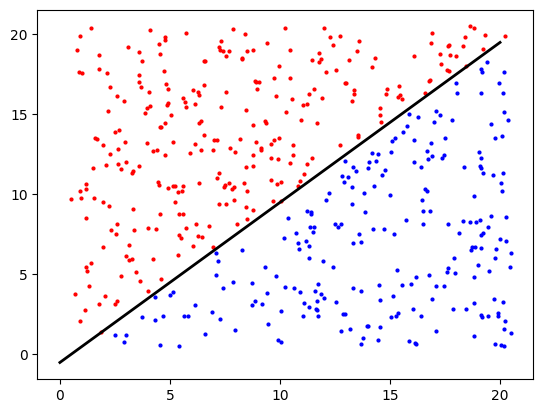

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A = 1.0
B = -1.0
C = -0.5



pontos = np.random.random( (2,500) )*20+.5
funcao = A*pontos[0,:] + B*pontos[1,:] + C

pontos_pos = pontos[:, funcao > 0]
pontos_neg = pontos[:, funcao < 0]
print(pontos_pos.shape, pontos_neg.shape)
plt.figure()
plt.scatter(pontos_pos[0,:], pontos_pos[1,:], c='b', s=4)
plt.scatter(pontos_neg[0,:], pontos_neg[1,:], c='r', s=4)
# mudar tamanho do ponto

x = np.linspace(0,20,100)
# ax + by + c = 0 -> by = -ax - c -> y = -a/b*x - c/b
y = -A/B*x - C/B
plt.plot(x,y, lw=2, c='k')

plt.show()

## Exercício 11
**Objetivo: Usar autograd para modelar sistema de classificação usando EQM**

Veja que agora fizemos um classificador cujos parâmetros são $A$, $B$ e $C$, e cujas entradas são $x$ e $y$. Em situações reais, raramente sabemos os parâmetros $A$, $B$ e $C$, e gostaríamos de identificá-los através de dados. Para isso, vamos usar a estratégia de descida pelo gradiente, assim como temos feito para o problema de regressão.

Gostaríamos de estimar uma função $f(x,y) = Ax+By+C$ de tal forma que $f(x_p,y_p)=1$ se $(x_p,y_p)$ for um ponto da categoria (ou classe) 1, e  $f(x_p,y_p)=-1$ se $(x_p,y_p)$ caso os pontos sejam da categoria 2.

O erro do nosso modelo é o EQM que relaciona $f(x,y)$ estimado pelo nosso modelo com os valores desejados 1 e -1.

1. Usando o que já fizemos, use o `autograd` para estimar o modelo $f(x,y) = Ax+By+C$ à partir dos dados abaixo.
1. Faça um plot semelhante ao do exercício 6 mostrando os pontos de cada categoria de dados com uma cor diferente e a reta estimada.
1. Modifique o valor da contante `SEP` para que tenha valores menores e valores maiores. O que acontece com o modelo estimado?
1. Modifique seu código para que ele passe a ter muito mais elementos da categoria 1 que elementos da categoria 2. O que acontece com o modelo estimado?

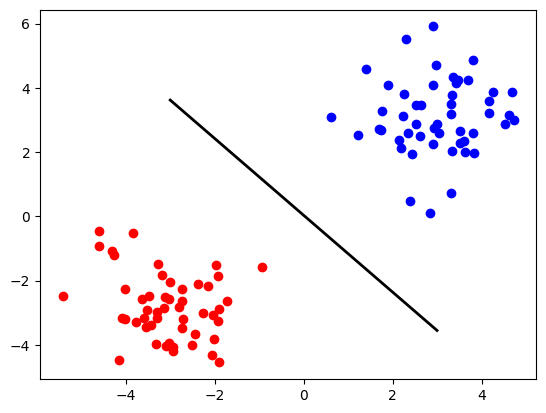

In [ ]:
import numpy as np
from autograd import grad

SEP =3

dados_c1 = np.random.randn(2,50) + SEP  #x
dados_c2 = np.random.randn(2,50) - SEP  #y


plt.figure()
plt.scatter(dados_c1[0,:], dados_c1[1,:], c='b')
plt.scatter(dados_c2[0,:], dados_c2[1,:], c='r')
plt.plot(x,y, lw=2, c='k')
plt.show()

(2, 50) (2, 50)


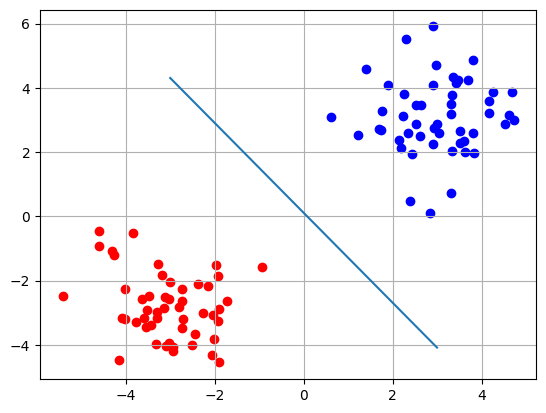

In [ ]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    A, B, C, pontos, val = parametros
    # Z_hat = A*X + B*Y + C
    est = A*pontos[0,:] + B*pontos[1,:] + C    #pontos[0,:] -> x, pontos[1,:] -> y
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = np.hstack ( (dados_c1, dados_c2))
alvos = np.hstack ( (np.ones(50), -1*np.ones(50)))

alpha = 0.01

for n in range(100):
    grad_ = g( (A, B, C, pontos, alvos) )
    A -= alpha*grad_[0]
    B -= alpha*grad_[1]
    C -= alpha*grad_[2]


funcao = A*pontos[0,:] + B*pontos[1,:] + C

# Reta:
# y = -A/B x + C/B
x = np.linspace(-3,3,100)
y = -A*x/B - C/B

pontos_pos = pontos[:, funcao > 0]
pontos_neg = pontos[:, funcao < 0]
print(pontos_pos.shape, pontos_neg.shape)
plt.figure()
plt.scatter(pontos_pos[0,:], pontos_pos[1,:], c='b')
plt.scatter(pontos_neg[0,:], pontos_neg[1,:], c='r')
plt.plot(x, y)
plt.grid()
plt.show()

## Exercício 12
**Objetivo: fazer uma formulação matricial para o classificador linear**

Até o momento, a função que executamos para o classificador linear é:

$$
f(x,y) = Ax + By + C
$$

Nessa formulação, estamos assumindo que nossa entrada tem duas dimensões ($x$ e $y$).

Veja como $f(x,y)$ funciona como se $A$ é o "peso" atribuído a $x$, e $B$ é o "peso" atribuído a $y$. $C$ é uma variável que nos dá uma tendência que é independente das entradas.

Essa interpretação funciona para pontos em $2$ dimensões. Se quisermos, podemos assumir que nossa entrada tem $N$ dimensões, expressas em um vetor-coluna $\boldsymbol x$. Nesse caso, os coeficientes do nosso classificador devem ser colocados também em um vetor-coluna $\boldsymbol w$, e então ficamos com:

$$
f(\boldsymbol x) = b + \sum_n w_n x_n = \begin{bmatrix} w_0 & w_1 & ... & w_{N-1} \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ ... \\ x_{N-1} \end{bmatrix} + b = \boldsymbol w^T \boldsymbol x + b
$$

Usando uma formulação matricial, faça um classificador linear para separar os dados abaixo. Quais são os pesos $\boldsymbol w$ do classificador que você encontrou?

In [38]:
import numpy as np

SEP = 10
N_DIMENSOES = 5
N_DADOS = 500

dados_c1 = np.random.randn(N_DIMENSOES,N_DADOS) + SEP
dados_c2 = np.random.randn(N_DIMENSOES,N_DADOS) - SEP

In [41]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = np.hstack ( (dados_c1, dados_c2))
print(pontos.shape)
alvos = np.hstack ( (np.ones(N_DADOS), -1*np.ones(N_DADOS)))
print(type(N_DIMENSOES))
w = np.random.randn( N_DIMENSOES,1)
b = 0.0
alpha = 10**-3

for n in range(1000):
    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

print(w)
print(b)


(5, 1000)
<class 'int'>
[[-0.03157673]
 [ 0.0196417 ]
 [ 0.08380589]
 [-0.05555978]
 [ 0.08355383]]
-0.00824227921476947


## Exercício 13
**Objetivo: avaliar o classificador**

Neste momento, já somos capazes de encontrar os pesos $\boldsymbol w$ e o *bias* $b$ do nosso classificador. Porém: ele funciona bem, na prática?

Para saber disso, precisamos de dois conjuntos de dados. Um deles, chamado *conjunto de treino*, será usado para encontrar os pesos do classificador. O outro, chamado *conjunto de teste*, será usado para avaliar se o classificador funciona bem em dados que ele ainda não encontrou. Ambos os conjuntos têm pares de entradas e saídas.

Neste exercício, começaremos com dados que já foram pré-processados. Eles foram extraídos do [breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), e já estão organizados para que as entradas e saídas correspondam ao que fizemos nesta aula.

1. Verifique as dimensões dos dados no conjunto de treino e no conjunto de teste.
1. Inicialize uma vetor de pesos e um *bias* para a classificação.
1. Com as inicializações aleatórias, execute o classificador no conjunto de teste e verifique o accuracy.
1. Ajuste o vetor de pesos e o *bias* através de reduzir o erro de classificação para o conjunto de *treino*. Ajuste a taxa de aprendizado $\alpha$ e o número de iterações que serão realizadas.
1. Com os pesos e *bias* ajustados, execute o classificador no conjunto de teste e verifique o accuracy. O treino foi efetivo?


In [ ]:
import joblib
X_train, X_test, y_train, y_test = joblib.load('./dados_classificacao.joblib')
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

In [ ]:
# Resolva o exercício aqui
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(30, 285) (1, 285)
(30, 284) (1, 284)


In [ ]:
# Inicialize um vetor de pesos e um bias
w = np.random.randn( X_train.shape[0], 1)
b = 0.0

In [ ]:
#execute o classificador no conjunto de teste e calcule a acurácia
y_est = w.T @ X_test + b
acc = accuracy(y_test, y_est)
print(acc)

0.34035087719298246


In [ ]:
# ajuste os pesos e o bias para minimizar o erro e ajuste a taxa de aprendizado e  o número de iterações
alpha = 10**-3
for n in range(1000):
    grad_ = g( (w, b, X_train, y_train) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

#execute o classificador no conjunto de teste e calcule a acurácia
y_est = w.T @ X_test + b
acc = accuracy(y_test, y_est)
print(acc)

0.34035087719298246


In [ ]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    w,b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = X_train
alvos = y_train

w = np.random.randn( 30,1)
b = np.random.randn()
alpha = 10**-2

for n in range(100):
    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

y_est = w.T @ X_test + b
print(accuracy(y_test, y_est))

0.7263157894736842


# Parte 4

## Exercício 14
*Objetivo: entender o que são decisões binárias em sequência*

Vamos jogar um jogo de adivinhações usando um baralho comum, com quatro naipes e 13 cartas por naipe (de "ás" a 10, e, adicionalmente, Q, J, K).

Neste jogo, teremos dois jogadores. 

* O jogador 1 deve escolher uma das cartas e manter sua escolha em segredo. 
* Em seguida, o jogador 2 deve fazer perguntas para tentar adivinhar qual carta foi escolhida.
* As perguntas devem ter resposta "sim" ou "não". Exemplos de perguntas válidas são:
    * A carta é um número?
    * A carta é um número ímpar?
    * A carta é do naipe "espadas"?
    * A carta é de um naipe preto ou vermelho?
    * A carta é uma figura?
    * A carta é uma "dama"?
    * A carta é uma dama de copas?
* Não é permitido perguntar se a carta é "maior que" outra carta!
* O objetivo do jogador 2 é conseguir encontrar a carta com o mínimo de perguntas.
* O objetivo do jogador 1 é conseguir escolher a carta que é obriga o jogador 2 a fazer o máximo de perguntas antes de encontrar a carta.

## Exercício 15
*Objetivo: comparar duas estratégias para o jogo de adivinhações*

Uma estratégia direta para o jogo de adivinhações é simplesmente fazer uma lista de todas as cartas e então perguntar sobre elas, uma por uma: "é um ás de esoadas? é um dois de espadas?", etc.

Uma outra estratégia é a de escolher perguntas que, independente da resposta, eliminam o maior número de possibilidades: "é uma carta vermelha?", "é uma carta de espadas?", "é um número ímpar?", e assim por diante.

1. Desenhe *árvores binárias* mostrando como as decisões são progressivamente aplicadas para escolher as cartas.
1. Analisando a árvore de cada, responda: qual dessas duas estratégias mais provavelmente leva a encontrar a carta com o mínimo de perguntas? 
1. Qual característica da árvore binária está ligada ao número de perguntas necessário para encontrar a carta?


## Exercício 16
*Objetivo: entender o que é entropia de Shannon e sua relação com o jogo de adivinhação*

Uma possível maneira de definir o "poder de decisão" de uma pergunta é usar a Entropia de Shannnon. A entropia é um conceito ligado à quantidade de informação de uma decisão ou de uma resposta, e foi refinada por [Shannon (1948)](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf). Não vamos deduzir os *motivos* que levam à formulação proposta por Shannon, mas, se você quiser, pode ler o artigo original - ele é difícil, porém muito claro.

A Entropia de Shannon é um valor $H(X)$ ligado a uma variável aleatória $X$. No caso discreto (que é o que nos interessa), a entropia é a soma de $- P(X=x_i) \log_2(P(X=x_i))$ para cada observação possível $x_i$, ou:

$$
H(X) = -\sum_i P(X=x_i) \log _2(P(X=x_i)).
$$

Uma formulação que é muito comum encontrar em livros é substituir $P(X=x_i)$ por $p(x_i)$, encontrando:

$$
H(X) = -\sum_i p(x_i) \log _2(p(x_i)).
$$

A Entropia de Shannon é medida em *bits* (ao longo das próximas aulas vamos entender melhor o motivo disso).

**EXEMPLO**

Se tivermos uma moeda honesta, temos uma variável aleatória $X$ com p(CARA)=0.5 e p(COROA)=0.5. Então, a Entropia de Shannon da moeda é:

$$
H(X) = - (0.5 \log _2(0.5) + 0.5 \log _2(0.5)) 
$$

Como $\log _2(0.5)=-1$, então:

$$
H(X) = - (-0.5 + (-0.5)) = - (-1) = 1 
$$

**EXEMPLO 2**

Se tivermos uma moeda desonesta, com p(CARA)=0.7 e p(COROA)=0.3, então temos uma Entropia de Shannon igual a:

$$
H(X) = - (0.3 \log _2(0.3) + 0.7 \log _2(0.7)) 
$$

Como $\log _2(0.3)$ é um número mais difícil de calcular, vamos recorrer ao recurso computacional:

In [ ]:
import scipy.stats as stats
print(stats.entropy([0.3, 0.7], base=2))

0.8812908992306927


Isso significa que, ao jogar uma moeda completamente honesta, ganhamos 1 bit de informação, ao passo que, se a moeda for enviesada (com o viés 0.3-0.7), ganhamos somente 0.88 bit de informação.

No limite do viés da moeda, temos uma moeda que sempre dá cara. Nesse caso, temos:

In [ ]:
import scipy.stats as stats
print(stats.entropy([0, 1], base=2))

0.0


isto é, jogar uma moeda que sabemos que sempre dá cara (ou que sempre dá coroa) não nos fornece nenhuma informação nova sobre o sistema.

Usando a função `stats.entropy`, sem se esquecer de usar `base=2`:

1. Encontre a entropia relacionada a jogar uma moeda enviesada com P(CARA) = 0.9.
1. No jogo de cartas, *fazer uma pergunta*, sob o ponto de vista do jogador que pergunta, pode ser entendida como *jogar uma moeda*, com probabilidade de "sim" e probabilidade de "não". Para a pergunta: *a carta é de um naipe vermelho?*, qual é P(sim) e qual é P(não)?
1. Qual é a entropia relacionada à pergunta: *a carta é de um naipe vermelho*?
1. Qual é a entropia relacionada à pergunta: *a carta é um rei de copas*?
1. Como a entropia se relaciona à "utilidade" de uma pergunta para nosso jogo de adivinhações?


# Exercício 17
*Objetivo: usar a entropia para otimizar a estratégia do jogo de adivinhações*

Vamos organizar nossas perguntas da seguinte forma:

1. Sabemos todas as cartas que podem ser candidatas à escolha. São $N$ cartas (começamos com $N=52$)
1. Para cada pergunta que podemos fazer, calculamos sua entropia.
1. Escolhemos a pergunta usando aquela que dá a máxima entropia.
1. Para a possibilidade da resposta ter sido SIM, temos $N \times P(SIM)$ cartas. Para a possibilidade da resposta ter sido NAO, temos $N \times P(NAO)$ cartas.
1. Após termos nossa resposta, refazemos a estratégia, agora considerando apenas as cartas que restaram.

Usando esta estratégia, tente jogar o jogo novamente. Quantas perguntas você conseguiu fazer?

## Exercício 18
*Objetivo: usar uma árvore de decisão*

Veja que as decisões que tomamos em nosso jogo de adivinhações estão organizadas em uma árvore. Por isso, esse tipo de algoritmo é chamado de "árvore de decisão". No exemplo abaixo, vamos usar uma árvore de decisão para adivinhar números de 1 a 10 à partir das características:

* é um número primo?
* é divisível por 2? por 3? por 5? por 7?
* o número faz parte da [sequência de fibonacci](https://pt.wikipedia.org/wiki/Sequ%C3%AAncia_de_Fibonacci)?

Acompanhe o código passo a passo:

In [ ]:
import pandas as pd

# Primeiro, vamos ler nossos dados e colocar o rótulo (ou: o número em si) em uma variável,
# e as suas características em outra variável:
df = pd.read_excel('numeros.xlsx')
#print(df.head())
df_rotulo = df['número']
df_features = df[ ['primo', 'fibo', 'div2', 'div3', 'div5', 'div7'] ]

   número  primo  fibo  div2  div3  div5  div7
0       1      0     1     0     0     0     0
1       2      1     1     1     0     0     0
2       3      1     1     0     1     0     0
3       4      0     0     1     0     0     0
4       5      1     1     0     0     1     0


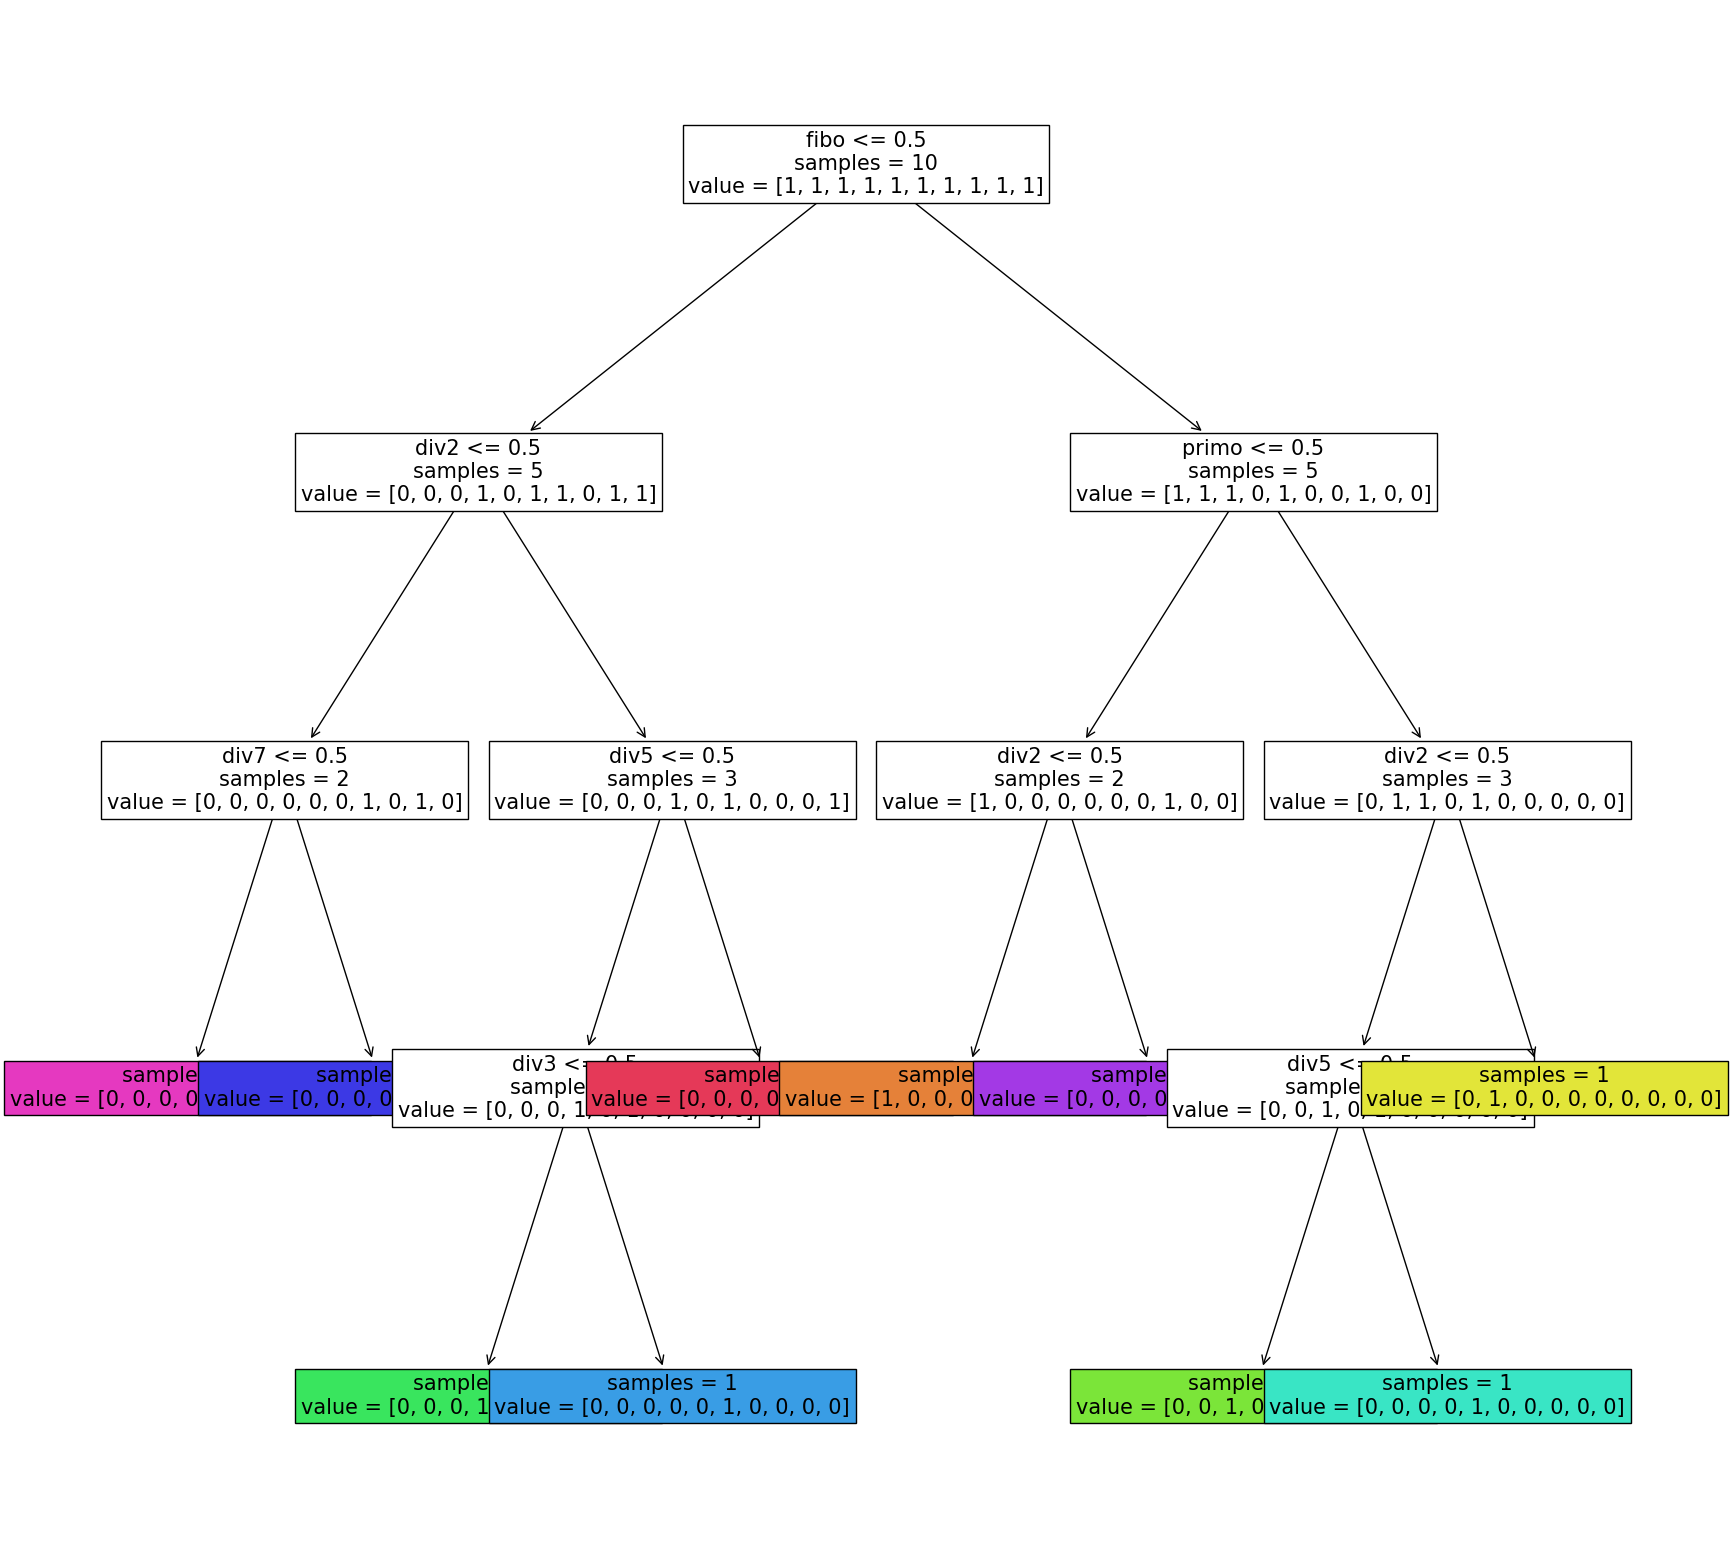

In [ ]:
# Depois, vamos instanciar uma árvore de decisão usando o pacote sklearn:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy')

# Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
tree.fit(df_features, df_rotulo)

# Podemos visualizar a árvore de decisão em uma figura!
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df_features.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)


1. Usando a árvore de decisão que foi montada automaticamente, jogue um jogo de "adivinhar o número". Quais números sáo mais difíceis de adivinhar, isto é, quais números precisam de mais perguntas para serem adivinhados?
1. Como seria uma árvore de decisão para a estratégia de perguntar número por número?
1. Qual é a propriedade da árvore que mede a "dificuldade" em encontrar um número?

## Exercício 19
*Objetivo: calcular a entropia para diferentes dados em jogos de RPG*

Em jogos de RPG, particularmente Dungeons & Dragons, é comum usar dados diferentes do comum, de seis lados. O jogo usa dados de 4 faces, 6, 8, 10, 12 e 20 faces, e eles são referidos como d4, d6, d8, d10, d12 e d20:

<img src="6dice(cropped).jpg" height=300  />

1. Calcule a entropia relacionada a jogar cada um desses dados, assumindo que são dados honestos (lembre-se de usar base 2!)
1. Como a entropia do d4 se relaciona com a entropia da jogada da moeda? E a entropia do d8?
1. Em um sistema digital, quantos bits são necessários para representar números que variam de 0 a 1? E de 0 a 3? E de 0 a 7?
1. Quantas faces tem um dado cuja jogada tem uma entropia de 5 bits?


In [ ]:
import numpy as np
import scipy.stats as stats
N=2
stats.entropy(np.ones(N)/N, base=2)

1.0

## Exercício 20
*Objetivo: relacionar a entropia à ideia de surpresa*

Provavelmente, você teria mais "surpresa" com o resultado de um d20 (que pode ser qualquer uma das 20 possibilidades) que com o resultado de uma moeda (que só tem dois resultados possíveis). Escreva com suas palavras um parágrafo relacionando a entropia (que é uma característica mensurável) com a surpresa (que é uma sensação subjetiva).

# Projeto

Neste projeto, vamos usar classificadores para identificar *quais são os fatores de risco para o acidente vascular cerebral (AVC)*. Um AVC (*stroke*) é um dano cerebral causado pela interrupção de seu fluxo sanguíneo. Ter um AVC é um problema sério porque pode levar a sequelas, então é melhor preveni-lo do que tentar lidar com suas consequências.

Temos à nossa disposição um conjunto de dados para [predição de AVCs](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). O que faremos é:

1. Treinar um classificador para predizer se houve ou não houve AVCs
1. Verificar a acurácia do classificador
1. Identificar quais são os fatores que mais provavelmente estão ligados a ter AVCs

## Teoria

### Separando linhas de dados em treino e teste

O que faremos será avaliar um classificador. Lembre-se que para fazer o classificador tivemos que usar uma base de dados pré-classificada. Porém, o que gostaríamos de saber é se, ao ser colocado em produção, o classificador terá um bom desempenho.

Para isso, vamos partir de uma premissa (vou chamar de *premissa número 1* mas esse não é um nome oficial) que é muito importante: a de que nossa base de dados é composta de elementos amostrados aleatoriamente do conjunto total de dados. Nessas condições, a distribuição dos dados na nossa base de dados é a mesma distribuição dos dados que encontraremos no mundo real.

Claro que gostaríamos de saber como nosso classificador se comporta no mundo real, e não na amostra dele que compõe nossa base de dados! Então, precisamos ao menos de ter alguns dados que seguem a mesma distribuição dos dados do mundo real, e que serão usados nas mesmas condições que os dados do mundo real.

Por isso, dividimos nosso conjunto de dados em dois conjuntos: treino e teste. O conjunto de treino é o que será usado para treinar (`fit`) os nossos classificadores. O conjunto de teste será usado para testar (`score`) os classificadores. O conjunto de teste existe para simular uma situação de produção (como se o classificador estivesse operando), então ele não pode ser usado em hipótese alguma para nenhum tipo de ajuste de parâmetros. Ao mesmo tempo, o conjunto de treino é aquele que foi usado para "ensinar" rótulos corretos aos classificadores, então o desempenho dos classificadores no conjunto de treino não é representativo de seu desempenho em produção.

Para dividir os conjuntos de treino e teste, você pode usar a função `train_test_split` do scikit-learn:

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

### Analisando os dados

Antes de começar qualquer coisa, vamos (como sempre) olhar para os dados que temos. Na nossa tabela, temos uma coluna com a identificação do paciente - essa é uma ID única, anônima, que permite referenciar ao paciente. Também, temos várias colunas com características do paciente: idade, sexo, se fuma, etc. Por fim, temos uma coluna com o *outcome*, que é a coluna `stroke`. Para usar corretamente os classificadores do scikit-learn, você deve separar suas tabelas entre as que têm dados de "entrada" (as features) das que têm dados de "saída" (os *outcomes*).

Outra coisa importante é que os dados deste dataset podem ser categóricos, e nossos sistemas não lidam bem com eles. Por isso, precisamos convertê-los para dados numéricos, por exemplo usando one-hot encoding. Pandas implementa a conversão para one-hot encoding usando `pd.get_dummies(df)`. Um exemplo de seu uso é o seguinte:

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['coluna_de_teste'] = ['categoria_1', 'categoria_2', 'categoria_3', 'categoria_1']
df['coluna_que_fica_inalterada_porque_ja_era_numerica'] = [3, 2, 1, 2]
df.head()

,coluna_de_teste,coluna_que_fica_inalterada_porque_ja_era_numerica
0,categoria_1,3
1,categoria_2,2
2,categoria_3,1
3,categoria_1,2


In [ ]:
df_ = pd.get_dummies(df)
df_.head()

,coluna_que_fica_inalterada_porque_ja_era_numerica,coluna_de_teste_categoria_1,coluna_de_teste_categoria_2,coluna_de_teste_categoria_3
0,3,1,0,0
1,2,0,1,0
2,1,0,0,1
3,2,1,0,0


### Avaliando o classificador

Quando o classificador atua sobre dados, encontramos, para cada entrada, uma saída predita, ou:

$$
\hat{y} = f(X),
$$
onde $f(.)$ é a função que implementa o classificador, $X$ são os dados de entrada e $\hat{y}$ são os dados de saída.

Neste momento, o que gostaríamos é de saber quantas vezes o classificador *acertou* dentre todas aquelas, isto é, precisamos:

1. Comparar cada valor de $\hat{y}$ a cada valor correspondente de $y$ (a saída "gabarito"),
1. Dividir o número de vezes que a saída é igual pelo número total de valores

O nome desta medida é acurácia (*accuracy*). Se você quiser, pode usar o [accuracy implementado pelo scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) para fazer essa avaliação.

#### Hipótese nula

A acurácia é uma medida válida de desempenho do classificador, mas é importante sempre colocá-la em contraste com as características do próprio conjunto de dados que foram utilizados. Um caso bastante patológico é o de termos um dataset no qual, por exemplo, 70% dos exemplos são da classe A e 30% são da classe B. Nesse caso, se nosso classificador sempre dizer que qualquer elemento é da classe A, ele terá acurácia de 70%, mas essa acurácia não significa um bom desempenho. Por isso, sempre que usamos a acurácia como medida de desempenho, usamos como base para comparação um classificador que sempre "chuta" a classe mais frequente no dataset.

### Referências bibliográficas

Na nossa análise de dados, podemos encontrar vários elementos ligados ao fenômeno que estamos analisando. Por exemplo, podemos descobrir que o fato de alguém preferir suco de laranja ao suco de maracujá é um fator que pode determinar o AVC. O problema disso é que não podemos saber, só com base nisso, se essa ligação é uma característica dos nossos dados ou se é uma característica geral do fenômeno. Por isso, sempre buscamos saber mais e verificar se há outros trabalhos que também apontam as mesmas ligações que encontramos. Para este tipo de análise, é importante encontrar trabalhos que foram publicados em veículos com revisão por pares (conferências e revistas são válidos, mas não materiais auto-publicados como blogs, vídeos ou *pre-prints*). Em especial, neste trabalho, vamos nos restringir apenas a materiais que estão disponíveis gratuitamente (open access), isto é, não utilizaremos materiais que precisam do pagamento de assinatura.


## Descrição do projeto

Neste projeto, o grupo deverá projetar e avaliar o classificador linear e o classificador por árvore de decisão no problema de predizer AVCs à partir da base de dados que está disponível no Kaggle. Também, deverá avaliar quais foram os fatores de risco identificados por cada um dos classificadores e, após, deverá verificar se esses fatores de risco identificados pelos classificadores já foram identificados anteriormente por algum estudo na área.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizado o projeto.
2. No diretório principal do repositório, deve haver um *notebook* comentado `demo.ipynb`, que, quando executado, executa todos os testes que geram os resultados alcançados.

**ENTREGAS**
* Link para o repositório onde está o projeto.
* No `README.md` do repositório, deve haver um resumo, com até 400 palavras, explicando qual foi a metodologia usada, quais foram os principais resultados encontrados, e o que o grupo descobriu sobre AVCs à partir da análise dos dados.
* O `demo.ipynb` deve estar comentado, célula a célula, em Markdown, explicando em linguagem natural a importância de cada passo e comentanto os resultados da execução de cada célula.
* O `demo.ipynb` deve ser colocado no repositório já executado, isto é, com todos os dados já gerados, de forma que seja possível visualizá-lo inteiramente sem executar as células.


**RUBRICA**

O projeto será avaliado usando três rubricas. [Duas delas dizem respeito à redação e ao código apresentado](rubricas.md), e são compartilhados por todos os projetos. Em especial, a rubrica de *argumentação* será aplicada ao conjundo do `README.md` e das células em markdown do `demo.ipynb`. Este projeto tem ainda requisitos específicos que estão na rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. A nota final é baseada na rubrica em que o trabalho obtiver o *menor* desempenho. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem o `demo.ipynb`, entregue sem resolver o problema que foi proposto.  | Não fez |
| E | Entregue, mas comete erros metodológicos graves: deixar de separar treino e teste, deixar de escolher as features relevantes, deixar de usar as variáveis categóricas em one-hot encoding | Entender |
| D | O projeto tem erros na avaliação de desempenho (accuracy) ou deixa de comparar o accuracy obtido com o classificador da hipótese nula. | Compreender |
| C | O projeto avalia corretamente o accuracy, mas deixa de verificar quais são as features mais relevantes para a classificação | Compreender |
| B | O método foi aplicado corretamente e o grupo encontrou quais são fatores de risco para AVC à partir da analise de seu dataset com uma metodologia consistente | Aplicar |
| A | Além da aplicação correta do método, o grupo encontrou uma ou mais referências bibliográficas (citadas no `README.md`) que corroboram com suas descobertas, ou, alternativamente, encontrou referências que encontraram o oposto do que foi descoberto pelo grupo | Analisar |

